In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,             # Use LaTeX for all text rendering
    "font.family": "serif",          # Use a serif font like Computer Modern
    "font.serif": ["Computer Modern"],
    "font.size": 10,                 # General font size (matches LaTeX \normalsize for 11pt)
    "axes.labelsize": 9,            # Font size for axis labels
    "axes.titlesize": 10,            # Font size for plot titles
    "legend.fontsize": 7,            # Font size for legends
    "xtick.labelsize": 7,            # Font size for x-tick labels
    "ytick.labelsize": 7,            # Font size for y-tick labels
    "axes.linewidth": 1,             # Line width for axes
    "lines.linewidth": 1,            # Line width for plot lines
    "patch.linewidth": 1,           # Line width for patches
    "figure.titlesize": 10
})

In [4]:
# scalings
L=1e5;g=9.81; m = 80; P_peloton_hat = 200 # Watts
rho = 1.225; A= 0.36;C_d_avg = 0.7
v_hat_peloton = (2*P_peloton_hat/(C_d_avg*rho*A))**(1/3)
print(v_hat_peloton*3.6) #kph
gravity_term = m*g*v_hat_peloton/P_peloton_hat
print(gravity_term)
acceleration_term = m*v_hat_peloton**3/L/P_peloton_hat
print(acceleration_term)
peloton_time = L/v_hat_peloton
print(peloton_time/3600) # hours
energy_scale = P_peloton_hat*peloton_time
print(energy_scale/4184)#kcal
omega = 0.5
lambda_ = 0.25
N_0 = 5
zeta_0_hat = N_0*4
zeta_0 = zeta_0_hat/L
print(zeta_0)
P_lurking = (0.05 + (1-0.05)*np.exp(-lambda_*zeta_0*L/4))/0.7
P_attack = 3.6249
print(P_lurking)
C_d_single=1/0.7
#plt.plot(np.linspace(0,1,100), theta(np.linspace(0,1,100)))
def C_d(zeta):
    if zeta > 0:
        return (0.05 + (1-0.05)*np.exp(-zeta*L/4*lambda_))/0.7 # you are inside the peloton
    elif zeta > 0.001:
        return 1/0.7 # you have fallen behind the peloton and you are by yourself
    else:
        return 1/0.7 # you are ahead of the peloton
C_d_lurking = C_d(zeta_0)
C_d_lurking

39.247345458971374
42.77960655027881
0.005183025591188855
2.5479430221475385
438.46055830454776
0.0002
0.46025651002454365


0.46025651002454365

/var/folders/wx/hvlspwk90qj6x4ybxggkjycr0000gn/T/ipykernel_68946/3353240007.py:10: RuntimeWarning: divide by zero encountered in divide
  P_attack = ((E_star-C_d_lurking*x_attack_vec)/(C_d_single**(1/3)*(1-x_attack_vec)))**(3/2)


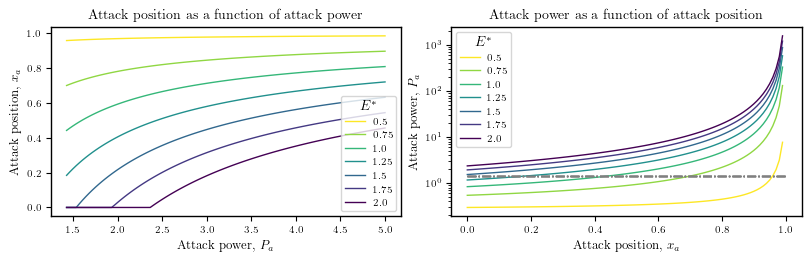

In [5]:
E_array = np.array([0.5,0.75,1,1.25,1.5,1.75,2.0])
cmap = plt.cm.viridis_r
colors = cmap(np.linspace(0, 1, len(E_array))) 
fig, ax = plt.subplots(nrows = 1, ncols=2, figsize=(8,2.5), dpi=100,constrained_layout=True)
P_attack_vec = np.linspace(C_d_single,5,100)
x_attack_vec = np.linspace(0,1,100)
for j,E_star in enumerate(E_array):
    x_attack = (C_d_single**(1/3)*P_attack_vec**(2/3)-E_star)/(C_d_single**(1/3)*P_attack_vec**(2/3)-C_d_lurking)
    ax[0].plot(P_attack_vec,np.where(x_attack>0, x_attack,0), color = colors[j],label=f"{E_star}")
    P_attack = ((E_star-C_d_lurking*x_attack_vec)/(C_d_single**(1/3)*(1-x_attack_vec)))**(3/2)
    ax[1].semilogy(x_attack_vec,P_attack, color = colors[j],label=f"{E_star}")
    ax[1].plot(x_attack_vec,np.ones_like(x_attack_vec)*C_d_single,'-.',color='grey')

ax[1].legend(loc="upper left", title="$E^*$", fontsize=7)
ax[0].legend(loc="lower right", title="$E^*$", fontsize=7)
ax[1].set_xlabel('Attack position, $x_a$')
ax[0].set_xlabel('Attack power, $P_a$')
ax[0].set_ylabel('Attack position, $x_a$')
ax[1].set_ylabel('Attack power, $P_a$')
ax[0].set_title('Attack position as a function of attack power')
ax[1].set_title('Attack power as a function of attack position')
plt.savefig('cycling_x_a_P_a_apr25.pdf')

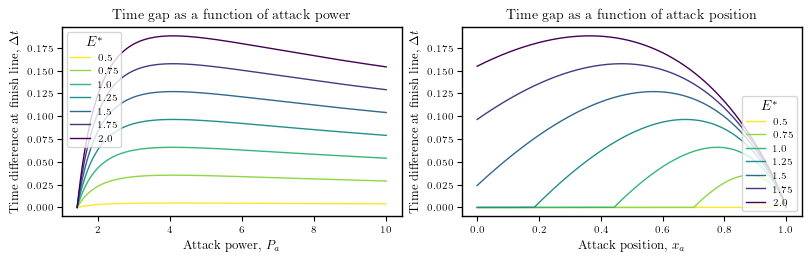

In [4]:
E_array = np.array([0.5,0.75,1,1.25,1.5,1.75,2.0])
cmap = plt.cm.viridis_r
colors = cmap(np.linspace(0, 1, len(E_array))) 
fig, ax = plt.subplots(nrows = 1, ncols=2, figsize=(8,2.5), dpi=100,constrained_layout=True)
P_attack_vec = np.linspace(C_d_single,10,1000)
x_attack_vec = np.linspace(0,1,5000)
for j,E_star in enumerate(E_array):
    DeltaT_terms_of_Pa = (C_d_lurking-E_star)/(C_d_single**(1/3)*P_attack_vec**(2/3)-C_d_lurking)*((C_d_single/P_attack_vec)**(1/3)-1)
    #x_attack = (C_d_single**(1/3)*P_attack_vec**(2/3)-E_star)/(C_d_single**(1/3)*P_attack_vec**(2/3)-C_d_lurking)
    ax[0].plot(P_attack_vec,DeltaT_terms_of_Pa, color = colors[j],label=f"{E_star}")
    DeltaT_terms_of_xa = 1-x_attack_vec-(1-x_attack_vec)**(3/2)*C_d_single**(1/2)/(E_star-C_d_lurking*x_attack_vec)**(1/2)
    DeltaT_terms_of_xa = np.where(DeltaT_terms_of_xa<0,0,DeltaT_terms_of_xa)
    #P_attack = ((E_star-C_d_lurking*x_attack_vec)/(C_d_single**(1/3)*(1-x_attack_vec)))**(3/2)
    ax[1].plot(x_attack_vec,DeltaT_terms_of_xa, color = colors[j],label=f"{E_star}")
    #ax[1].plot(x_attack_vec,np.ones_like(x_attack_vec)*C_d_single,'-.',color='grey')

ax[1].legend(loc="lower right", title="$E^*$", fontsize=7)
ax[0].legend(loc="upper left", title="$E^*$", fontsize=7)
ax[0].set_ylabel('Time difference at finish line, $\Delta t$')
ax[0].set_xlabel('Attack power, $P_a$')
ax[1].set_xlabel('Attack position, $x_a$')
ax[1].set_ylabel('Time difference at finish line, $\Delta t$')
ax[0].set_title('Time gap as a function of attack power')
ax[1].set_title('Time gap as a function of attack position')
plt.savefig('cycling_Delta_T_xa_Pa_apr25.pdf')

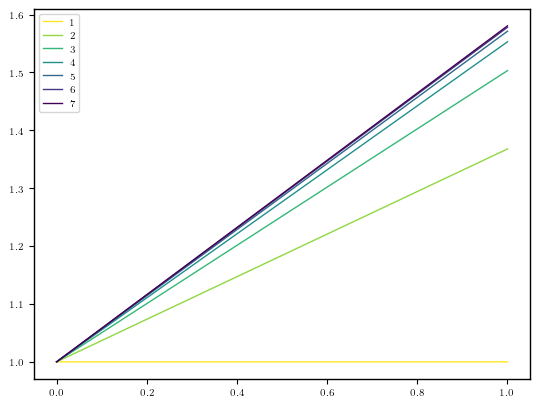

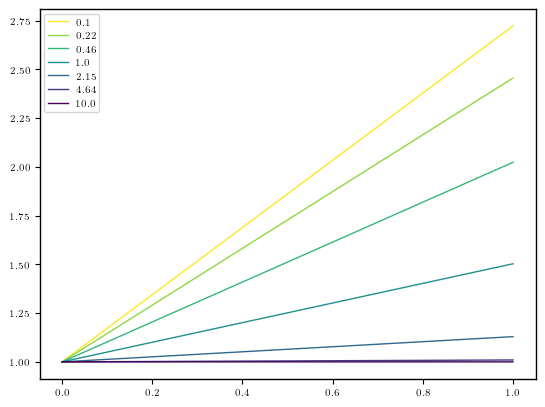

In [51]:
omega =1
i_0_vec = np.array([1,2,3,4,5,6,7])
colors = cmap(np.linspace(0, 1, len(i_0_vec))) 
for j,i_0 in enumerate(i_0_vec):
    plt.plot(x_attack_vec, 1-x_attack_vec+x_attack_vec*(1-np.exp(-omega*i_0))/(1-np.exp(-omega)),color=colors[j],label=i_0) 
plt.legend()
plt.show()
omega_vec = np.logspace(-1,1,7)
i_0 = 3
colors = cmap(np.linspace(0, 1, len(i_0_vec))) 
for j,omega in enumerate(omega_vec):
    plt.plot(x_attack_vec, 1-x_attack_vec+x_attack_vec*(1-np.exp(-omega*i_0))/(1-np.exp(-omega)),color=colors[j],label=round(omega,2))

plt.legend() 